1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

Standard Deviation is to find the different in the data and the calculation. Standard Error of the Mean is to run many times of the data and find the different of every data's mean.
If we want to know the standard error of the original dataset,we only need to calculate the standard deviation of this distribution. But we need to use bootstrapping to calculate the standard error of the mean.

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1)What is the process of bootstrapping?

The process of bootstrapping is to regenerate the sample lots of times.

2)What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to find the distribution from the sample.

3)If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

I will use n to run 1000 times and find the distribution of average of population. If it has a small distribution then my hypothesized might be plausible.

8. Complete the following assignment.
Vaccine Data Analysis Assignment

I use ChatGPT to generate the code for me.

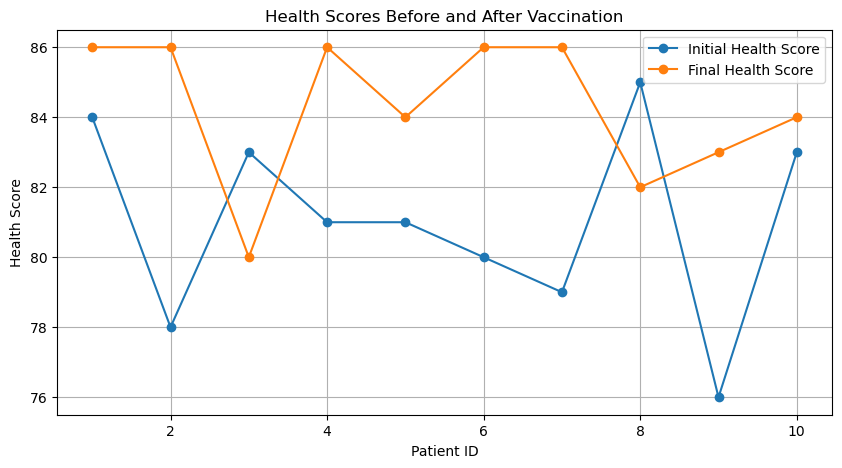

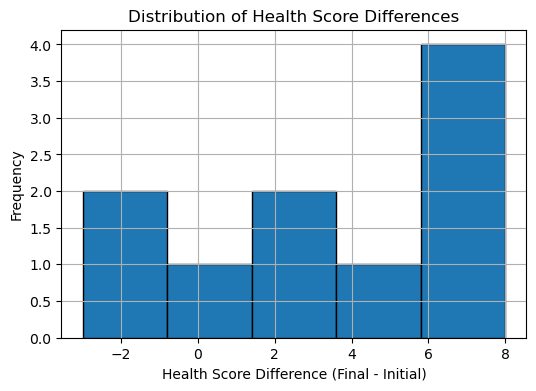

Observed Mean Difference: 3.3
95% Confidence Interval: [0.7, 5.5]


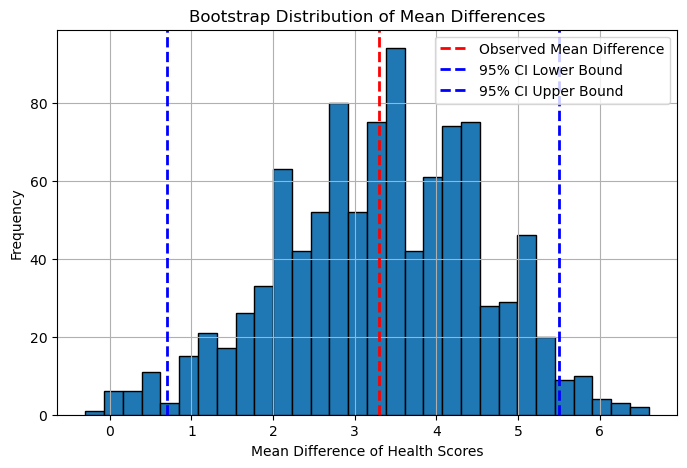

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create a CSV file with the given data and read it
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Calculate the difference between Final and Initial Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Initial visualization of Health Scores Before and After Vaccination
plt.figure(figsize=(10, 5))
plt.plot(df['PatientID'], df['InitialHealthScore'], marker='o', label='Initial Health Score')
plt.plot(df['PatientID'], df['FinalHealthScore'], marker='o', label='Final Health Score')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Health Scores Before and After Vaccination')
plt.legend()
plt.grid()
plt.show()

# Visualization of Health Score Differences
plt.figure(figsize=(6, 4))
plt.hist(df['HealthScoreDifference'], bins=5, edgecolor='black')
plt.xlabel('Health Score Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.title('Distribution of Health Score Differences')
plt.grid()
plt.show()

# Bootstrapping to get the empirical distribution of mean differences
n_iterations = 1000  # Number of bootstrap samples
boot_means = []
for _ in range(n_iterations):
    boot_sample = df['HealthScoreDifference'].sample(frac=1, replace=True)
    boot_means.append(np.mean(boot_sample))

# Compute 95% confidence interval for the bootstrap mean differences
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)
mean_diff_observed = np.mean(df['HealthScoreDifference'])

print(f"Observed Mean Difference: {mean_diff_observed}")
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")

# Visualization of the Bootstrap Distribution
plt.figure(figsize=(8, 5))
plt.hist(boot_means, bins=30, edgecolor='black')
plt.axvline(mean_diff_observed, color='red', linestyle='dashed', linewidth=2, label='Observed Mean Difference')
plt.axvline(lower_bound, color='blue', linestyle='dashed', linewidth=2, label='95% CI Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label='95% CI Upper Bound')
plt.xlabel('Mean Difference of Health Scores')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Mean Differences')
plt.legend()
plt.grid()
plt.show()


Here is the ChatGpt share link: https://chatgpt.com/share/671c13fa-9b84-800c-b80f-699a54a136d0